---

# **Projeto** | Pipeline de Dados do Telegram


Linkedin [Walisson Carvalho](https://www.linkedin.com/in/wacarv-/)

---

# **Tópicos**

<ol type="">
  <li>Contextualização;</li>
  <li>Ingestão;</li>
  <li>ETL;</li>
  <li>Apresentação;</li>
  <li>Storytelling.</li>
</ol>

## 1\. Contextualização

O objetivo desse projeto é armazenar todas as mensagens enviadas em um grupo do telegram na Amazon Web Services ([Aws](https://aws.amazon.com/pt/free/?gclid=CjwKCAjwtqmwBhBVEiwAL-WAYeH7GdvLSqQIVxD7zdYLuc-sO73YtA6vLSHKF1OlA-XXxKYKcWvsthoCdMwQAvD_BwE&trk=2ee11bb2-bc40-4546-9852-2c4ad8e8f646&sc_channel=ps&ef_id=CjwKCAjwtqmwBhBVEiwAL-WAYeH7GdvLSqQIVxD7zdYLuc-sO73YtA6vLSHKF1OlA-XXxKYKcWvsthoCdMwQAvD_BwE:G:s&s_kwcid=AL!4422!3!561843094929!e!!g!!aws!15278604629!130587771740&all-free-tier.sort-by=item.additionalFields.SortRank&all-free-tier.sort-order=asc&awsf.Free%20Tier%20Types=*all&awsf.Free%20Tier%20Categories=*all)), identificando e utilizando os serviçoes da AWS mais úteis para concluir o projeto.




## 2\. Ingestão

A etapa de **ingestão** é o processo onde os dados serão ingeridos em sua forma "crua" tranzendo-os em seu formato original. Esses dados serão armazenados em um Data Lake.


Primeiro foi necessário criar uma [REST API](https://aws.amazon.com/pt/api-gateway/) na Aws e configurar uma integração com o [Lamba](https://aws.amazon.com/pt/pm/lambda/?gclid=CjwKCAjw3NyxBhBmEiwAyofDYfGf1G5NHEFfizRRcVpYCZtaKs3FaSveVgszbr7_IL-jbYRtcY2UQBoC_CYQAvD_BwE&trk=56f58804-91cd-4af4-98d4-afe277a57fd3&sc_channel=ps&ef_id=CjwKCAjw3NyxBhBmEiwAyofDYfGf1G5NHEFfizRRcVpYCZtaKs3FaSveVgszbr7_IL-jbYRtcY2UQBoC_CYQAvD_BwE:G:s&s_kwcid=AL!4422!3!651510591822!e!!g!!lambda%20aws!19828231347!148480170233)



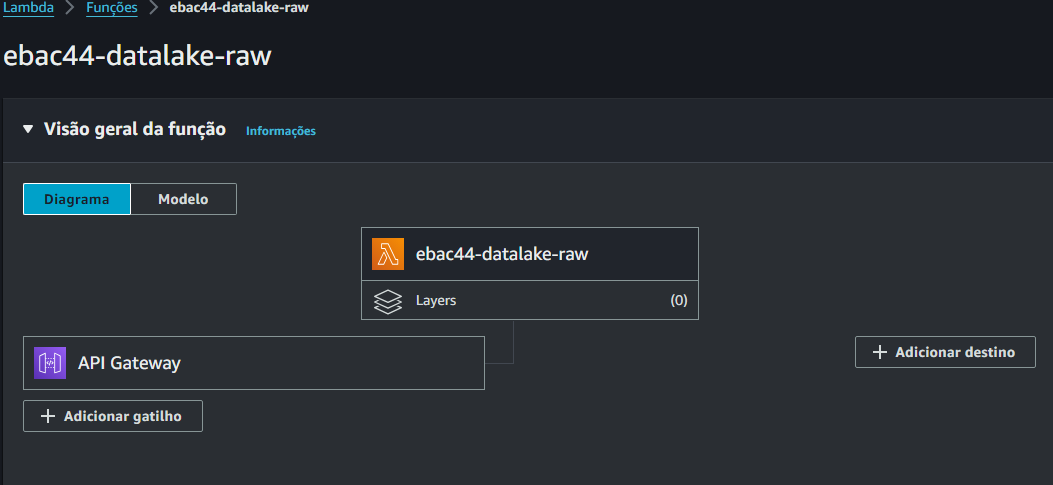




In [ ]:
#Código da Função Lambda

import os
import json
import logging
from datetime import datetime, timezone

import boto3


def lambda_handler(event: dict, context: dict) -> dict:

  '''
  Recebe uma mensagens do Telegram via AWS API Gateway, verifica no
  seu conteúdo se foi produzida em um determinado grupo e a escreve,
  em seu formato original JSON, em um bucket do AWS S3.
  '''

  # vars de ambiente

  BUCKET = os.environ['AWS_S3_BUCKET']
  TELEGRAM_CHAT_ID = int(os.environ['TELEGRAM_CHAT_ID'])

  # vars lógicas

  tzinfo = timezone(offset=timedelta(hours=-3))
  date = datetime.now(tzinfo).strftime('%Y-%m-%d')
  timestamp = datetime.now(tzinfo).strftime('%Y%m%d%H%M%S%f')

  filename = f'{timestamp}.json'

  # código principal

  client = boto3.client('s3')

  try:

    message = json.loads(event["body"])
    chat_id = message["message"]["chat"]["id"]

    if chat_id == TELEGRAM_CHAT_ID:

      with open(f"/tmp/{filename}", mode='w', encoding='utf8') as fp:
        json.dump(message, fp)

      client.upload_file(f'/tmp/{filename}', BUCKET, f'telegram/context_date={date}/{filename}')

  except Exception as exc:
      logging.error(msg=exc)
      return dict(statusCode="500")

  else:
      return dict(statusCode="200")import os
import json
import logging
from datetime import datetime, timezone

import boto3


def lambda_handler(event: dict, context: dict) -> dict:

  '''
  Recebe uma mensagens do Telegram via AWS API Gateway, verifica no
  seu conteúdo se foi produzida em um determinado grupo e a escreve,
  em seu formato original JSON, em um bucket do AWS S3.
  '''

  # vars de ambiente

  BUCKET = os.environ['AWS_S3_BUCKET']
  TELEGRAM_CHAT_ID = int(os.environ['TELEGRAM_CHAT_ID'])

  # vars lógicas

  tzinfo = timezone(offset=timedelta(hours=-3))
  date = datetime.now(tzinfo).strftime('%Y-%m-%d')
  timestamp = datetime.now(tzinfo).strftime('%Y%m%d%H%M%S%f')

  filename = f'{timestamp}.json'

  # código principal

  client = boto3.client('s3')

  try:

    message = json.loads(event["body"])
    chat_id = message["message"]["chat"]["id"]

    if chat_id == TELEGRAM_CHAT_ID:

      with open(f"/tmp/{filename}", mode='w', encoding='utf8') as fp:
        json.dump(message, fp)

      client.upload_file(f'/tmp/{filename}', BUCKET, f'telegram/context_date={date}/{filename}')

  except Exception as exc:
      logging.error(msg=exc)
      return dict(statusCode="500")

  else:
      return dict(statusCode="200")

Após essas etapas, foi criado um Bucket no [S3](https://aws.amazon.com/pt/pm/serv-s3/?gclid=CjwKCAjw3NyxBhBmEiwAyofDYcm2hdhGz5e7N5_0llcjANe1iWf41YAczuXYIFOwaL12Z8fz1eDOkxoCUKAQAvD_BwE&trk=9c7f9c59-8d98-452d-8a14-441a9b6492f3&sc_channel=ps&ef_id=CjwKCAjw3NyxBhBmEiwAyofDYcm2hdhGz5e7N5_0llcjANe1iWf41YAczuXYIFOwaL12Z8fz1eDOkxoCUKAQAvD_BwE:G:s&s_kwcid=AL!4422!3!589951433465!e!!g!!s3!16393976584!133547553013), onde os dados serão de fato ingeridos.

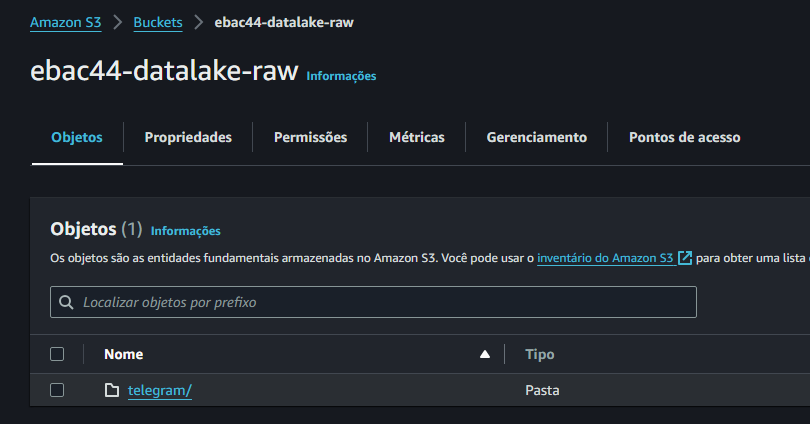


## 3\. Extração, Transformação e Carregamento (ETL)

Nessa etapa os dados serão coletado, tranformados para que fiquem em um formato aceitável para análises e carregados.

Novamente serão utilizados os serviços Aws S3 e Lambda e também o [Event Bridge](https://aws.amazon.com/pt/eventbridge/) para criar regras de execução da tarefa.

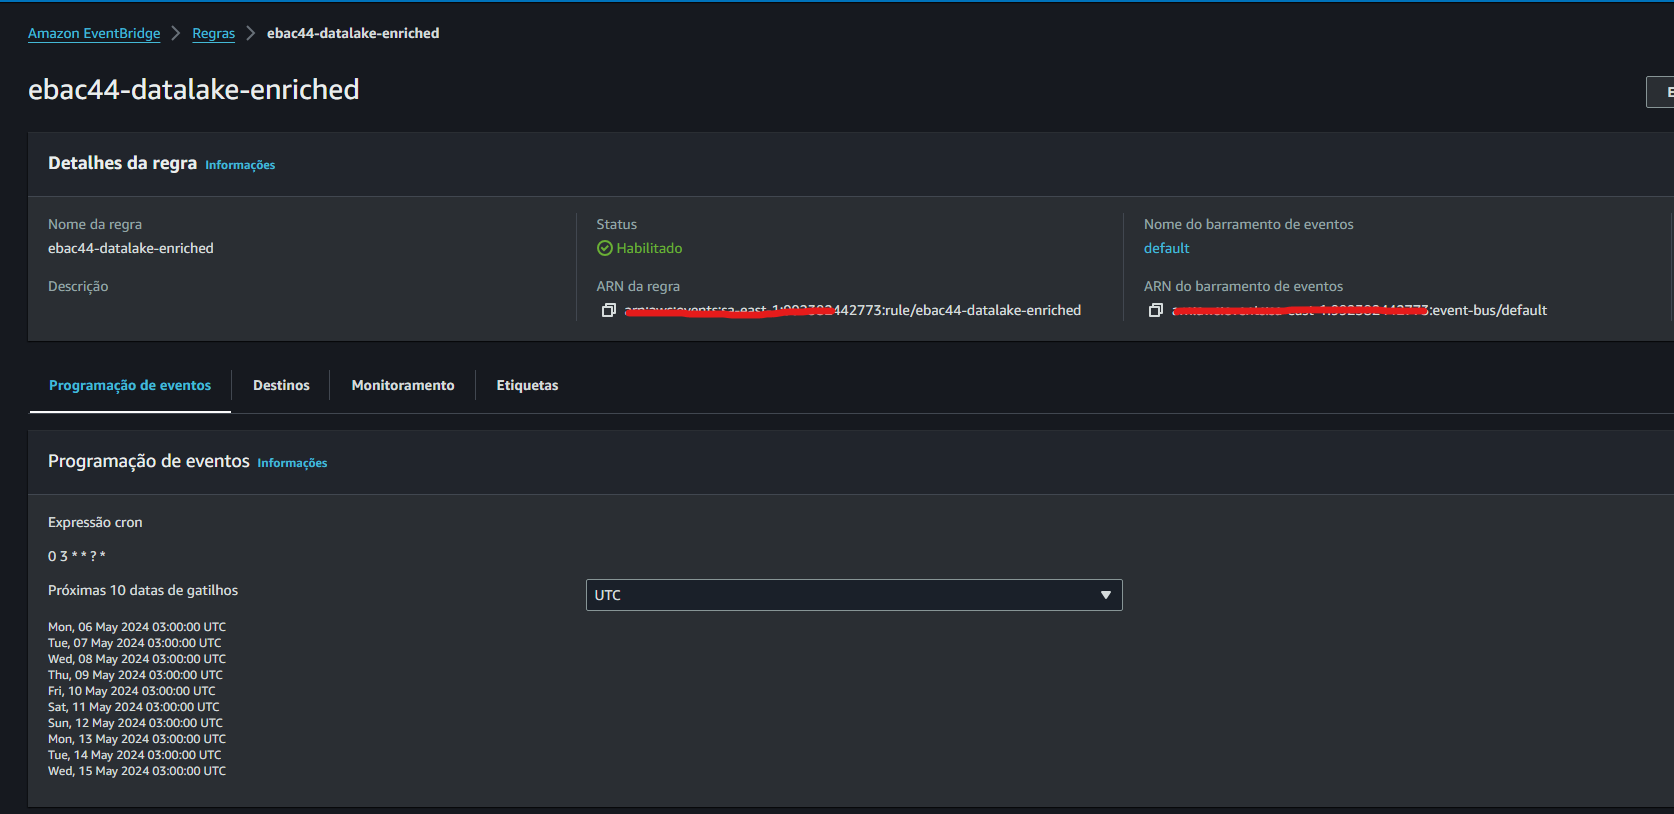


In [ ]:
#código da nova função Lambda

import os
import json
import logging
from datetime import datetime, timedelta, timezone

import boto3
import pyarrow as pa
import pyarrow.parquet as pq


def lambda_handler(event: dict, context: dict) -> bool:

  '''
  Diariamente é executado para compactar as diversas mensagensm, no formato
  JSON, do dia anterior, armazenadas no bucket de dados cru, em um único
  arquivo no formato PARQUET, armazenando-o no bucket de dados enriquecidos
  '''

  # vars de ambiente

  RAW_BUCKET = os.environ['AWS_S3_BUCKET']
  ENRICHED_BUCKET = os.environ['AWS_S3_ENRICHED']

  # vars lógicas

  tzinfo = timezone(offset=timedelta(hours=-3))
  date = (datetime.now(tzinfo) - timedelta(days=1)).strftime('%Y-%m-%d')
  timestamp = datetime.now(tzinfo).strftime('%Y%m%d%H%M%S%f')

  # código principal

  table = None
  client = boto3.client('s3')

  try:

      response = client.list_objects_v2(Bucket=RAW_BUCKET, Prefix=f'telegram/context_date={date}')

      for content in response['Contents']:

        key = content['Key']
        client.download_file(RAW_BUCKET, key, f"/tmp/{key.split('/')[-1]}")

        with open(f"/tmp/{key.split('/')[-1]}", mode='r', encoding='utf8') as fp:

          data = json.load(fp)
          data = data["message"]

        parsed_data = parse_data(data=data)
        iter_table = pa.Table.from_pydict(mapping=parsed_data)

        if table:

          table = pa.concat_tables([table, iter_table])

        else:

          table = iter_table
          iter_table = None

      pq.write_table(table=table, where=f'/tmp/{timestamp}.parquet')
      client.upload_file(f"/tmp/{timestamp}.parquet", ENRICHED_BUCKET, f"telegram/context_date={date}/{timestamp}.parquet")

      return True

  except Exception as exc:
      logging.error(msg=exc)
      return False

Foi feito um processo de [Data Wrangling](https://www.alteryx.com/pt-br/glossary/data-wrangling) para realizar a etapa de transfomação dos dados.

Codigo utilizado:

In [ ]:
def parse_data(data: dict) -> dict:

  date = datetime.now().strftime('%Y-%m-%d')
  timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

  parsed_data = dict()

  for key, value in data.items():

      if key == 'from':
          for k, v in data[key].items():
              if k in ['id', 'is_bot', 'first_name']:
                parsed_data[f"{key if key == 'chat' else 'user'}_{k}"] = [v]

      elif key == 'chat':
          for k, v in data[key].items():
              if k in ['id', 'type']:
                parsed_data[f"{key if key == 'chat' else 'user'}_{k}"] = [v]

      elif key in ['message_id', 'date', 'text']:
          parsed_data[key] = [value]

  if not 'text' in parsed_data.keys():
    parsed_data['text'] = [None]

  return parsed_data

## 3\. Apresentação


Nessa etapa de apresentação a ferramenta utilizada será o [Aws Athena](https://aws.amazon.com/pt/athena/). Com o Athena é possível realizar consultas **SQL** e acessar os dados armazenados no S3.

Criandos a tabela na Athena


```sql
CREATE EXTERNAL TABLE `telegram`(
  `message_id` bigint,
  `user_id` bigint,
  `user_is_bot` boolean,
  `user_first_name` string,
  `chat_id` bigint,
  `chat_type` string,
  `text` string,
  `date` bigint)
PARTITIONED BY (
  `context_date` date)
ROW FORMAT SERDE
  'org.apache.hadoop.hive.ql.io.parquet.serde.ParquetHiveSerDe'
STORED AS INPUTFORMAT
  'org.apache.hadoop.hive.ql.io.parquet.MapredParquetInputFormat'
OUTPUTFORMAT
  'org.apache.hadoop.hive.ql.io.parquet.MapredParquetOutputFormat'
LOCATION
  's3://ebac44-datalake-enriched/telegram/'
```

Realizando uma "query" para verificar a quantidade de mensagens por dia do grupo

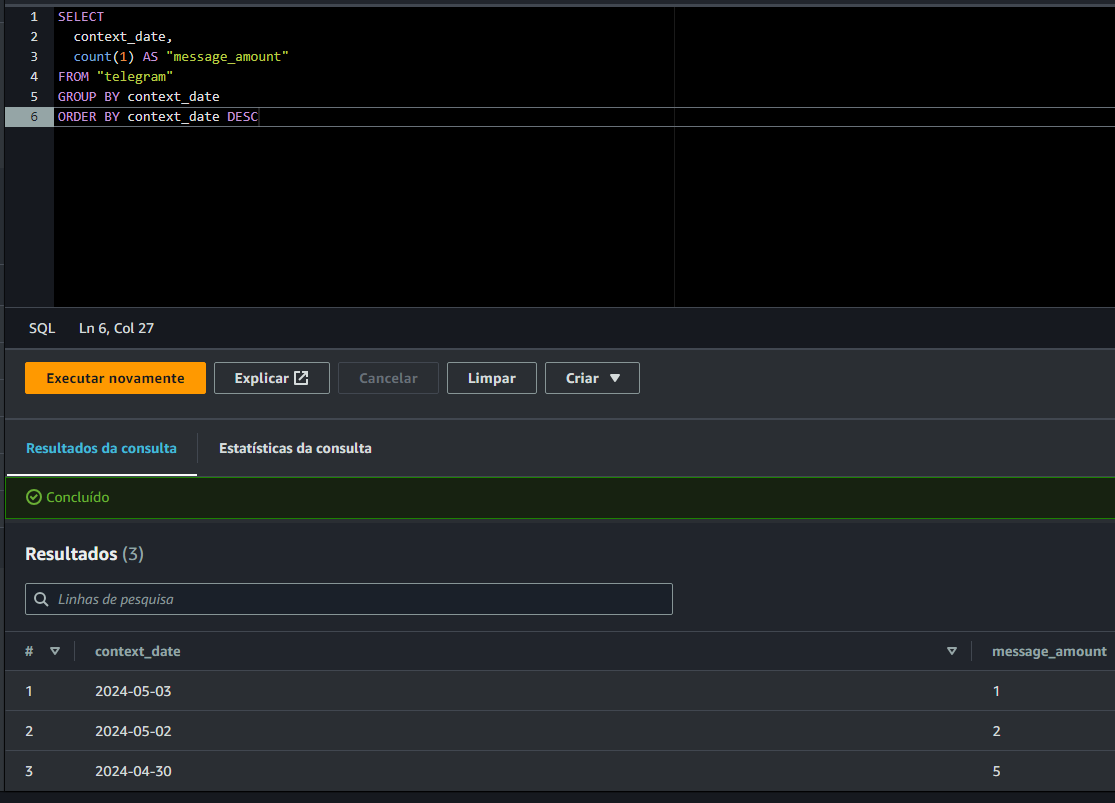

Query para vevrificar os usuários que mandaram mensagem

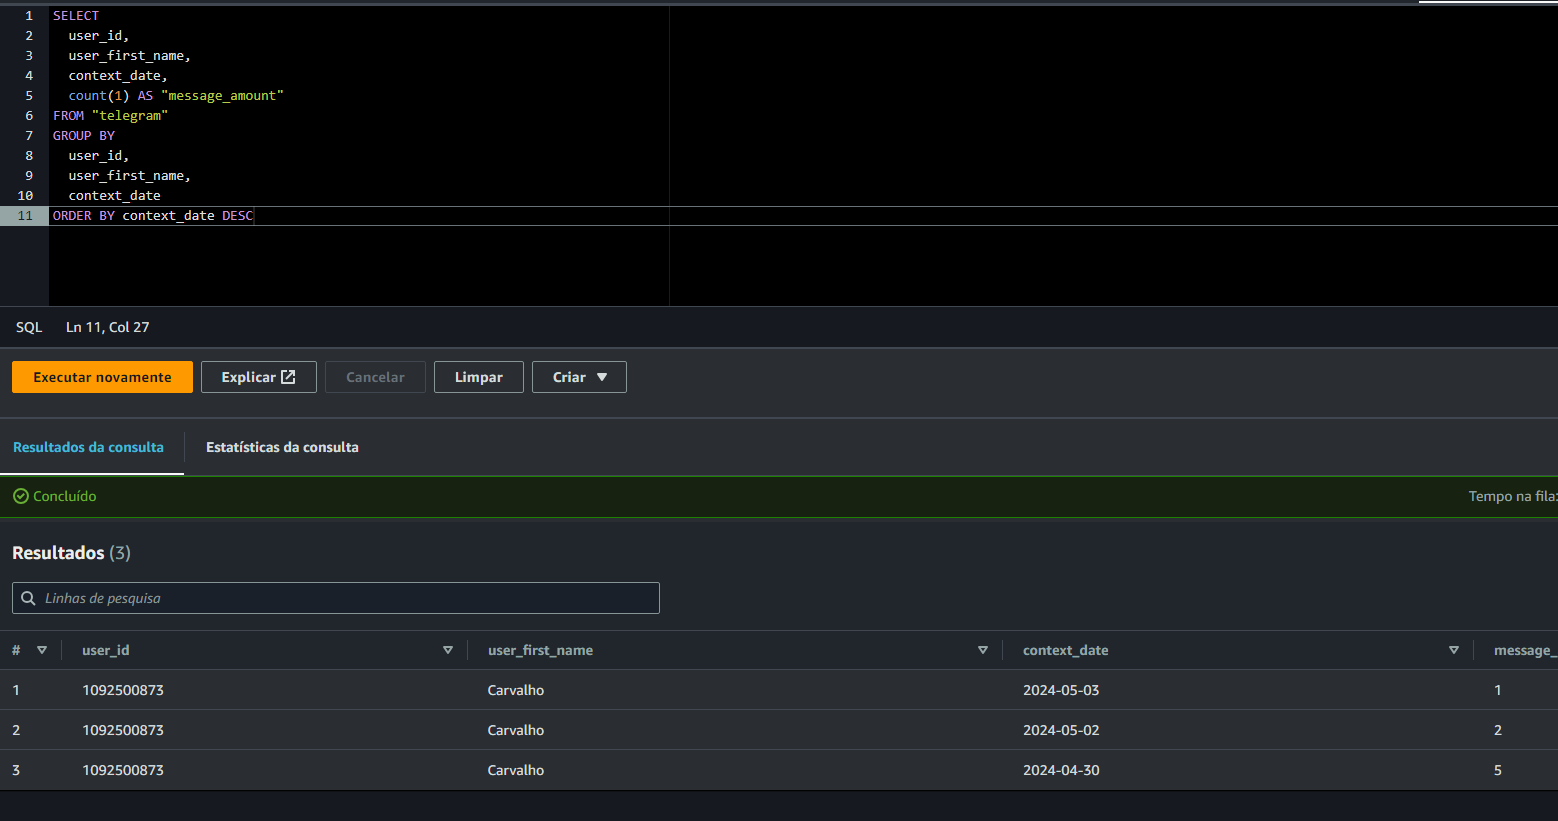

## 5\. Storytelling

A imagem abaixo representa de forma clara todas etapas que foram realizadas no projeto.



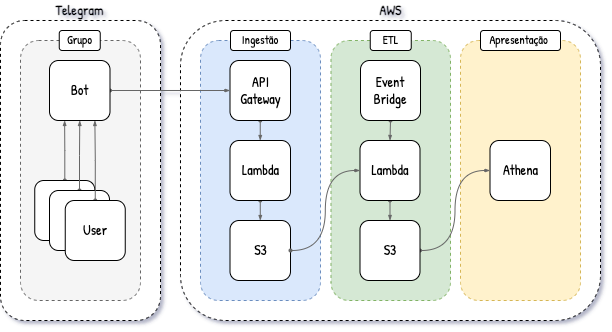



Começando pelo Telegram utilizando o [BotFather](https://telegram.me/BotFather), foi possível criar um bot que tem acesso às mensagens que os usuário enviam no grupo (mensagens de todos os formatos)

Já na AWS, iniciando pelo processo de **ingestão** foi criada uma **REST API** que tem a função de captar as mensagens do Bot do telegram, ainda nessa etapa foi criada uma função no AWS Lambda que objetiva persistir os dados ingeridos no S3.

No **ETL** foi usado o serviço Event Brigde da Aws para criar regras de atualização, às 00:00 horas (horário de brasília) todo o processo roda e as mensagens do dia em questão são armazenadas em pasta com a data do dia. Também foi necessário criar outra função Lambda para processar as mensagens do grupo.

A etapa de **apresentação** é a entrega final do projeto, se tudo ocorreu da forma como foi desenhado, foi possível criar as tabelas e as "views" em **SQL** com o Athena, para a geração de insight's.

